# DAY 2 — Data Cleaning & Modernization (2025 Reframing)

In [1]:
import sys
sys.path.append('../')

In [2]:
import pandas as pd, numpy as np
from src.utils import *

In [3]:
df = load_csv('../data/raw/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#QUICK CHECKS

df.info()
df.describe(include='all')
# df.isnull().sum()    ---- Commented as no missing records found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [5]:
# from the info we can see that total charges is classified as object although the records are numerical, hence need to convert this column to numeric.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].info()
df['TotalCharges'].isnull().sum()
df.describe(include='all')

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7032.000000,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300441,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.771362,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,401.450000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3794.737500,NaN


**Missing Treatment**

In [6]:
# since total charges column has 11 null values therefore need to treat these MISSING values.
# Treating Missing Values: we chose to use median values to treat these values.
skewness = df['TotalCharges'].skew()
print(skewness)
# WHY MEDIAN METHOD? since data is heavily skewed also...
    # DELETION- avoided as majority row records are not missing,
    # FF & BF are avoided as its not a time-series data, and values doest depends on order or continuity.
    # mean method avoided since distribution is heavily skewed.
    # mode is avoided as data is continous float data. 
    # Heavy computational Techiques are avoided to keep project simple.

0.961642499724251


In [7]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [8]:
df.info()
df.isnull().sum() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# Remove leading/trailing spaces from column names

df.columns = df.columns.str.strip()

**Renaming Columns to Modern mapping**

In [10]:
rename_map = {
 'customerID':'customer_id',
 'gender':'gender',
 'tenure':'months_subscribed',
 'Contract':'subscription_type',
 'InternetService':'streaming_quality',
 'PaymentMethod':'payment_mode',
 'MonthlyCharges':'monthly_plan_cost',
 'TotalCharges':'total_revenue',
 'Churn':'subscription_canceled'
}
df.rename(columns=rename_map, inplace=True)


# **Adding Synthetic Engagement Features**

In [11]:
np.random.seed(3)
# ============================
# 10.
df['app_usage_hours'] = np.round(np.random.uniform(0.5,7.0,len(df)),1)
# ============================
# 11
df['last30d_usage_hours'] = np.round(df['app_usage_hours']*30*np.random.uniform(0.85,1.25,len(df)),1)
# STREAMING FLAGS → Higher OTT usage
# Users who had streaming services with telco likely consume more OTT content.
if "StreamingTV" in df.columns:
    uplift_tv = np.random.uniform(1.20, 1.35, size=len(df))
    df.loc[df['StreamingTV'] == 'Yes', 'last30d_usage_hours'] *= uplift_tv[df['StreamingTV'] == 'Yes']
if "StreamingMovies" in df.columns:
    uplift_movies = np.random.uniform(1.10, 1.25, size=len(df))
    df.loc[df['StreamingMovies'] == 'Yes', 'last30d_usage_hours'] *= uplift_movies[df['StreamingMovies'] == 'Yes']
# ============================
# 12
df['customer_rating'] = np.random.randint(1,6,len(df))
# ============================
# 13
df['promo_email_clicks'] = np.random.poisson(lam=3,size=len(df))
# ============================
# 14
df['device_type'] = np.random.choice(['Mobile','Desktop','SmartTV'],len(df),p=[0.65,0.20,0.15])
# ============================
# 15. Number of profiles per account
df['num_profiles'] = np.random.choice([1,2,3,4],len(df),p=[0.6,0.25,0.10,0.05])
# MULTIPLE LINES → More OTT profiles (probabilistic, NOT direct mapping)
# Having multiple phone lines may loosely indicate a bigger household.
if "MultipleLines" in df.columns:
    mask = df['MultipleLines'] == 'Yes'
    df.loc[mask, 'num_profiles'] += np.random.choice([0, 1], p=[0.6, 0.4])
# ============================
# 16. Auto-renew (PaperlessBilling → good proxy; else random)
if 'PaperlessBilling' in df.columns:
    df['auto_renew'] = df['PaperlessBilling'].map({'Yes':1, 'No':0}).astype(int)
else:
    df['auto_renew'] = np.random.choice([0,1],len(df), p=[0.4,0.6])
# ============================
# 17. Support tickets last 6 months
df['support_tickets_last6m'] = np.random.poisson(lam=0.8, size=len(df))
# TECH SUPPORT → Fewer support tickets (makes sense)
# Customers who purchased tech support from telco might face fewer issues.
if "TechSupport" in df.columns:
    reduction = np.random.uniform(0.60, 0.70, size=len(df))
    df.loc[df['TechSupport'] == 'Yes', 'support_tickets_last6m'] = (df.loc[df['TechSupport'] == 'Yes', 'support_tickets_last6m'] * reduction[df['TechSupport'] == 'Yes']
    ).round()
# ============================
# 18. NPS score (-20 to +80 realistic range)
df['nps_score'] = np.random.randint(-20, 81,len(df))
# ============================
# 19. Active in last 30 days
df['is_active_last30d'] = (df['last30d_usage_hours'] > 1.0).astype(int)
# -------------------------------------------------------------------------------------------------------------------------------------------

In [12]:
df_mod = df.drop(columns=['StreamingTV', 'StreamingMovies', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'MultipleLines', 'SeniorCitizen' , 'Partner' , 'PaperlessBilling' , 'Dependents' , 'PhoneService'], errors='ignore')
df_mod.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             7043 non-null   object 
 1   gender                  7043 non-null   object 
 2   months_subscribed       7043 non-null   int64  
 3   streaming_quality       7043 non-null   object 
 4   subscription_type       7043 non-null   object 
 5   payment_mode            7043 non-null   object 
 6   monthly_plan_cost       7043 non-null   float64
 7   total_revenue           7043 non-null   float64
 8   subscription_canceled   7043 non-null   object 
 9   app_usage_hours         7043 non-null   float64
 10  last30d_usage_hours     7043 non-null   float64
 11  customer_rating         7043 non-null   int64  
 12  promo_email_clicks      7043 non-null   int64  
 13  device_type             7043 non-null   object 
 14  num_profiles            7043 non-null   

In [13]:
# Ensure numbers never go below logical minimums.
df_mod['support_tickets_last6m'] = df_mod['support_tickets_last6m'].clip(lower=0)
df_mod['last30d_usage_hours'] = df_mod['last30d_usage_hours'].clip(lower=0.5)
df_mod['num_profiles'] = df_mod['num_profiles'].clip(lower=1)
df_mod['promo_email_clicks'] = df_mod['promo_email_clicks'].clip(lower=0)

In [14]:
df_mod.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             7043 non-null   object 
 1   gender                  7043 non-null   object 
 2   months_subscribed       7043 non-null   int64  
 3   streaming_quality       7043 non-null   object 
 4   subscription_type       7043 non-null   object 
 5   payment_mode            7043 non-null   object 
 6   monthly_plan_cost       7043 non-null   float64
 7   total_revenue           7043 non-null   float64
 8   subscription_canceled   7043 non-null   object 
 9   app_usage_hours         7043 non-null   float64
 10  last30d_usage_hours     7043 non-null   float64
 11  customer_rating         7043 non-null   int64  
 12  promo_email_clicks      7043 non-null   int64  
 13  device_type             7043 non-null   object 
 14  num_profiles            7043 non-null   

In [15]:
df_mod.head()

,customer_id,gender,months_subscribed,streaming_quality,subscription_type,payment_mode,monthly_plan_cost,total_revenue,subscription_canceled,app_usage_hours,last30d_usage_hours,customer_rating,promo_email_clicks,device_type,num_profiles,auto_renew,support_tickets_last6m,nps_score,is_active_last30d
0,7590-VHVEG,Female,1,DSL,Month-to-month,Electronic check,29.85,29.85,No,4.1,125.9,3,3,Mobile,1,1,0,79,1
1,5575-GNVDE,Male,34,DSL,One year,Mailed check,56.95,1889.50,No,5.1,177.9,4,2,Mobile,1,0,0,54,1
2,3668-QPYBK,Male,2,DSL,Month-to-month,Mailed check,53.85,108.15,Yes,2.4,88.5,5,4,Desktop,1,1,0,-1,1
3,7795-CFOCW,Male,45,DSL,One year,Bank transfer (automatic),42.30,1840.75,No,3.8,124.0,5,5,SmartTV,1,0,0,44,1
4,9237-HQITU,Female,2,Fiber optic,Month-to-month,Electronic check,70.70,151.65,Yes,6.3,182.8,5,2,Mobile,2,1,0,10,1


In [16]:
df_mod['streaming_quality']=df_mod['streaming_quality'].replace({'Fiber optic':'4K','DSL':'HD','No':'SD'})

In [17]:
df_mod['nps_score']=(df_mod['nps_score']+20)//10

**Encoding Target(column)** + dropping duplicates if any

In [18]:
df_mod['subscription_canceled'] = (df['subscription_canceled'].map({'Yes': 1, 'No': 0}).astype(int))

df_mod.drop_duplicates(inplace=True)


In [19]:
#Saving the CLEANED DATA

save_csv(df_mod,'../data/processed/cleaned_subscriptions_churn.csv')


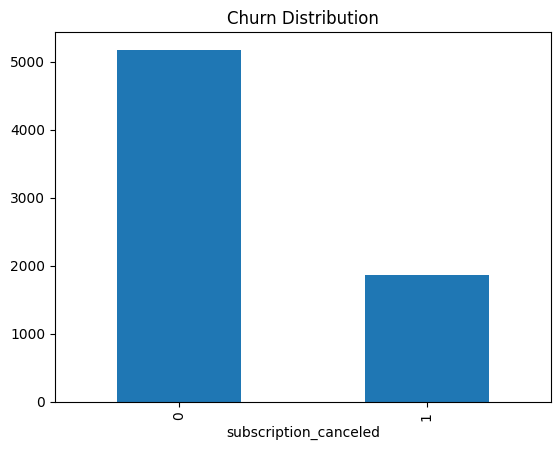

In [20]:
# Quick- VISUALIZATION:

import matplotlib.pyplot as plt
df_mod['subscription_canceled'].value_counts().plot(kind='bar',title='Churn Distribution')
plt.show()


### Key Cleaning Actions
- Converted `TotalCharges` to numeric  
- Handled missing values  
- Renamed columns to modern OTT equivalents  
- Added synthetic engagement features  
- Encoded target variable  
- Removed duplicates  

### Day 2 Summary
✅ Cleaned & standardized dataset ready for EDA  
✅ Saved as `data/processed/cleaned_subscriptions_2025.csv`  
Next: Day 3 → Exploratory Data Analysis (EDA)
